# 분류Classification(1)

- 지도학습의 대표적 유형
- 데이터를 머신러닝 알고리즘으로 학습해 모델을 생성하고, 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측



### 앙상블 방법Ensemble Method
- 정형 데이터의 예측 분석 영역에서 높은 예측 성능
- 서로 다른/같은 알고리즘을 결합하여 사용(대부분 동일한 알고리즘 결합)
- 기본 알고리즘으로 <b>결정 트리</b> 사용
- 배깅(Bagging)/부스팅(Boosting) 방식
- 근래의 앙상블 방법은 부스팅 방식으로 지속적 발전

cf) 배깅의 랜덤 포레스트(Random forest)은 예측 성능, 빠른 수행 시간, 유연성 등으로 많이 사용
부스팅 방식의 그래디언트 부스팅(Gradient Boosting)은 수행 시간이 오래 걸려 최적화 모델 튜닝이 어려웠음<br>

## 결정 트리
- 데이터의 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것
- if/else 기반으로 표현
- <b>데이터의 어떤 기준을 바탕으로 규칙을 만들어야 효율적인 분류가 될 것인가</b>가 알고리즘의 성능을 좌우

<img src='https://media.vlpt.us/images/dbj2000/post/9899931f-a1f1-4c00-bbbb-89d4834e1105/image.png' width=60%></img>

<br>
루트 노드: 트리의 시작<br>
규칙 노드(Decision Node): 규칙 조건<br>
리프 노드(Leaf Node): 결정된 클래스 값<br>
서브 트리: 새 규칙 조건마다 생성<br>

- 피처가 결합해 규칙 조건을 만들 때마다 규칙 노드가 생성
- 트리의 깊이가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높음
- 적은 결정 노드로 높은 예측 정확도 > 균일한 데이터 세트를 구성할 수 있도록 분할(split) 필요

<br>

<b>데이터 균일도</b>
- 데이터를 구분하는 데 필요한 정보의 양에 영향
- 결정 노드는 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만들어야 함
- 정보 이득이 높거나 지니 계수가 낮은 조건을 찾아 반복적으로 분할하여 특정 분류에 데이터가 모두 속하면 분할을 멈추고 분류를 결정
<br>
<br>

<b>균일도 측정</b>
- <b>정보 이득</b><br>
엔트로피; 데이터 집합의 혼잡도(다른 값↑ 같은 값↓)<br>
1-엔트로피 지수<br><br>
- <b>지니 계수</b>: 0이 가장 평등하고 1로 갈수록 불평등

<br>

<b>장점</b>
- 쉽고 직관적
- 데이터의 균일도만 신경쓰기 때문에 사전 가공(피처 스케일링, 정규화 등) 영향도가 크지 않음


<b>단점</b>
- 과적합으로 성능이 떨어질 수 있음 > 트리의 크기를 사전에 제한하는 튜닝 필요


### 파라미터
- min_samples_split: 노드 분할을 위한 최소한의 샘플 데이터 수, 과적합 제어<br>디폴트 2, 작을수록 과적합 가능성 증가
- min_samples_leaf: 말단 노드(leaf)가 되기 위한 최소한의 샘플 데이터 수<br>비대칭 데이터의 경우 특정 클래스가 극도로 작을 수 있어서 작게 설정 필요
- max_features: 분할을 위해 고려될 최대 피처 개수<br>디폴트 None. int: 대상 피처의 개수, float: 전체 중 대상 피처의 퍼센트
- max_depth: 트리의 최대 깊이, 디폴트 None.
- max_laef_nodes: 말단 노드의 최대 개수

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#결정트리
dt_clf = DecisionTreeClassifier(random_state = 156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

#### export_graphvize()
- 그래프 형태로 시각화할 수 있는 출력 파일 생성
- export_graphvize(학습이 완료된 estimator, output_file="", class_names=, feature_names=,)

*impurity=TRUE : gini 출력<br>
*filled=TRUE : 채우기 선택

In [37]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names ,
                feature_names = iris_data.feature_names, impurity=True, filled=True)

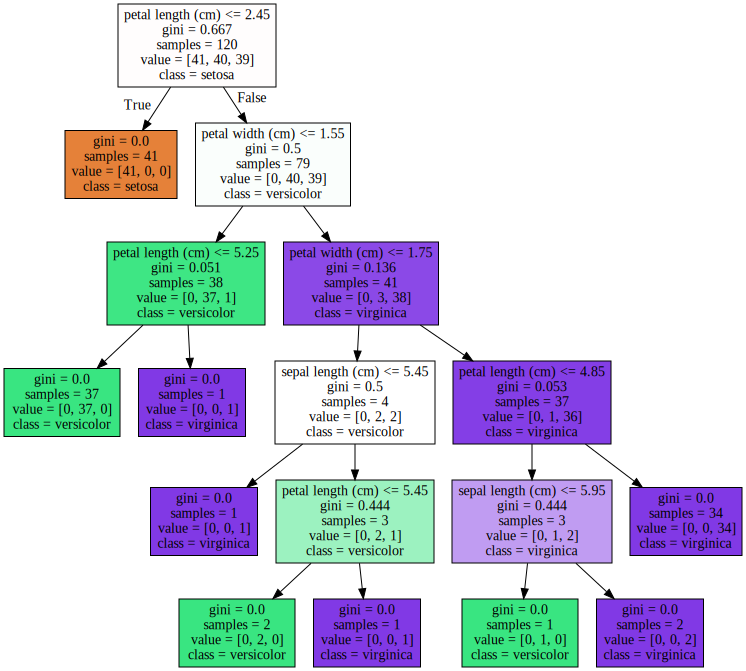

In [38]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- 피처의 조건(pental length(cm)<=2.45): 자식 노드를 만들기 위한 규칙 조건, 조건이 없다면 리프노드
- gini: value= []로 주어진 데이터 분포의 지니 계수
- samples: 현 규칙에 해당하는 데이터 건수
- value: 클래스 값 기반의 데이터 건수
- class=versicolor: 하위 노드를 가질 경우 가장 많은 건수의 클래스

### 파라미터 변경에 따른 트리 변화
p.195

- max_depth=3, 더 간단한 결정 트리
- min_samples_split=4, sample이 4 미만이라면 다른 class 값이 있어도 split하지 않아서 트리가 간단해짐
- min_samples_leaf=4, 값을 키우면 리프 노드가 될 수 있는 조건이 완화되어 리프 노드를 만들기 위한 규칙 조건이 변경

**결정 트리는 균일도에 기반해 어떤 속성을 규칙 조건으로 선택하느냐가 중요한 요건**

**feature_importances_**: 규칙을 정하는데 피처의 중요한 역할 지표를 제공. ndarray로 값을 반환하며 피처 순서대로 값이 할당됨.

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


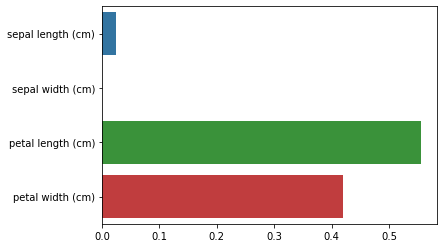

In [39]:
import seaborn as sns
import numpy as np
%matplotlib inline

print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

### 결정 트리 과적합(Overfitting)

**make_classification()**: 분류를 위한 테스트용 데이터 만들기  
**visualize_boundary()**: 클래스 값을 예측하는 결정 기준을 색상과 경계로 나타냄

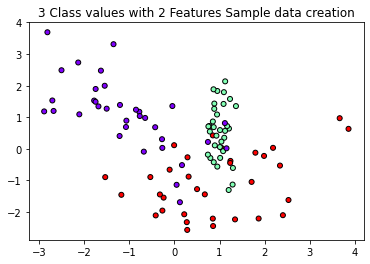

In [40]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

In [41]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

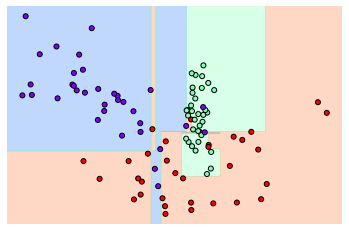

In [42]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

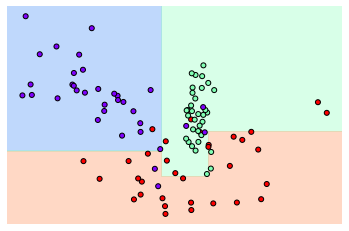

In [43]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

min_samples_leaf=6을 설정하여 결정 기준 경계가 완화된 모습을 볼 수 있음.  
학습 데이터에 지나치게 최적화된 분류보다 더 뛰어날 가능성이 있음.

### 결정 트리 실습

30명에게 스마트폰 센서를 장착한 뒤 사람의 동작과 관련된 여러가지 피처를 수집한 데이터

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+', header=None,names=['column_index','column_name'])

feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


중복된 피처명 찾기

In [45]:
feature_dup_df = feature_name_df.groupby('column_name').count()

print(feature_dup_df[feature_dup_df['column_index'] > 1].count())

feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [46]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

pd.merge(data1, data2, how='outer')  
how='outer': 한 쪽에만 있는 데이터도 merge에 포함, left, right 등도 가능

In [47]:
import pandas as pd

def get_human_dataset( ):
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+', header=None,names=['column_index','column_name'])
    
    #중복된 피처명 수정 함수 사용
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    #칼럼명으로 부여하기 위해 리스트로 반환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    #칼럼명 action
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [48]:
print('학습 피처 데이터셋 info()')
print(X_train.info())

학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [49]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


레이블 값이 특정 값에 치우치지 않고 고르게 분포됨

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)

print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


GridSearchCV를 사용하여 max_depth값을 변화시키며 예측 성능 확인

In [51]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.3min finished


GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


**cv_result_**: CV세트의 하이퍼 파라미터를 순차적으로 입력했을 때의 성능 수치

In [52]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [53]:
max_depths = [6, 8 ,10, 12, 16 ,20, 24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


깊이가 깊어질수록 과적합의 영향이 커짐을 확인할 수 있음.

In [54]:
params = {
    'max_depth' : [8, 12, 16 ,20], 
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)

print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.6min finished


GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


**best_estimator_**: 최적 하이퍼 파라미터

In [55]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)

print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


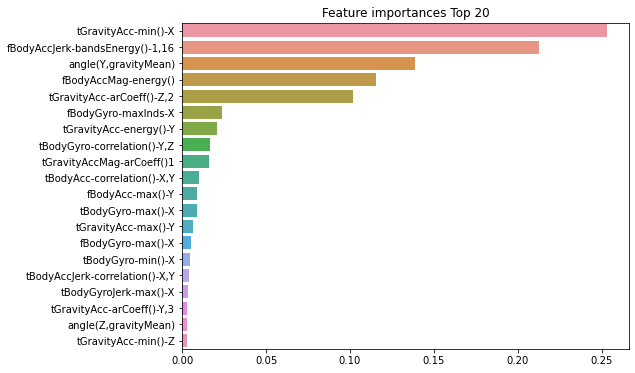

In [56]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )

ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)

plt.show()

## 앙상블 학습
보팅(Voting), 배깅(Bagging), 부스팅(Boosting)의 3가지로 나눌 수 있으며, 스태깅을 포함한 다른 방법이 있음.

- 보팅&배깅: 여러 분류기가 투표를 통해 최종 예측 결과를 결정  
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FbCmIoE%2Fbtqy0RW3DBW%2Fcu6uK7BXlJ5KBUZSmz7R0K%2Fimg.png' width=70%></img>

### Voting
서로 다른 알고리즘을 가진 분류기를 결합하여 예측한 결과로 보팅을 통해 최종 예측 결과 선정

### Bagging
- 단일 알고리즘으로 원본 데이터 샘플링을 다르게 가져가면서 학습을 수행
- 부트스트래핑(Bootstrapping) 분할 방식: 개별 분류기에게 데이터를 샘플링하여 추출, 알고리즘의 정확도와 안정성
- 교차 검증과 달리 중첩을 허용하여 중복된 데이터가 존재(복원추출)
- 랜덤 포레스트 알고리즘 방식이 대표적

<img src='https://quantdare.com/wp-content/uploads/2016/04/bb3.png' width=70%></img>

### Boosting
- 분류기가 순차적으로 학습을 수행
- 앞선 분류기의 예측이 틀린 데이터는 뒤의 분류기에서 가중치를 부여하여 학습
- 이상치에 취약하기도 함
- 그래디언트 부스트, XGBoost, LightGBM 등

### Stacking
다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어 다른 모델로 재학습시켜 결과 예측

## Hard/Soft Voting
- hard voting: 결괏값 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정
- soft voting: 분류기의 레이블 값 결정 확률을 더하고 평균을 내서 확률이 높은 레이블 값을 최종 보팅 결괏값으로 선정
- 소프트 보팅이 예측 성능이 좋아 일반적으로 사용

## Voting Classifier
**load_breast_cancer()**: 위스콘신 유방암 데이터 세트. 유방암의 악성종양, 양성종양 여부를 결정하는 이진 분류 데이터

In [57]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


**VotingClassifier**: 보팅 분류기 생성  
VotingClassifier(estimator=[튜플 형식으로 classifier 객체 입력], voting='hard/soft')

In [58]:
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,test_size=0.2 , random_state= 156)

vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)

print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


보팅으로 여러 분류기를 결합한다고 해서 무조건 예측 성능이 향상되지 않음.

## 랜덤 포레스트

- 비교적 빠른 수행 속도, 높은 예측 성능
- 결정 트리를 기반으로 한 알고리즘이라 직관적이고 쉬운 장점을 그대로 가지고 있음
- 부트스트래핑 분할 방식 사용

**RandomFrestClassifier**: 랜덤 포레스트 기반의 분류 지원

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


### 하이퍼 파라미터 및 튜닝

- 트리 기반의 앙상블 알고리즘의 단점은 하이퍼 파라미터가 너무 많고, 그로 인한 튜닝 시간이 많이 소모된다는 것
- 랜덤 포레스트는 결정 트리에서 사용되는 하이퍼 파라미터와 같은 파라미터가 대부분이라 적은 편에 속함 

**n_estimators**: 결정 트리의 개수(디폴트 10). 많을수록 성능이 좋아지지만 학습 수행 시간이 오래 걸림  
**max_features**: 결정 트리의 파라미터와 같음. but 디폴트는 'auto(sqrt)'와 같음  
**max_depth, min_samples_leaf**ㄹ와 같은 결정 트리의 과적합 개선 파라미터도 똑같이 적용 가능

GridSearchCV로 파라미터 튜닝 진행  
**n_jobs=-1**: 모든 CPU코어를 사용하여 학습 가능

In [60]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


n_estimator=300으로 증가

In [61]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)

print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9165


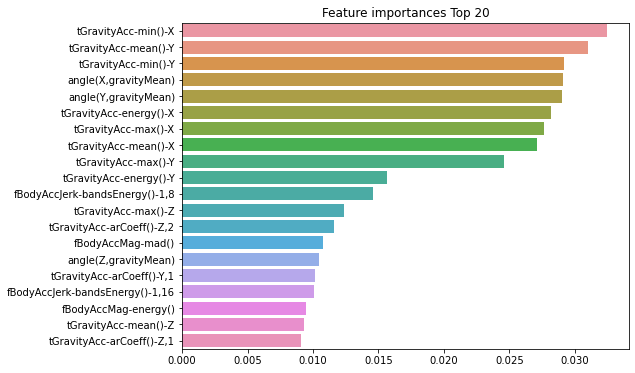

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

## GBM(Gradient Boosting Machine)

- 부스팅 방식은 순차적으로 학습-예측하여 가중치를 더해 개선해나가는 방식
- 대표적인 예로 AdaBoost와 그래디언트 부스트가 있음
- GBM과 AdaBoost과 유사하지만 가중치 업데이트를 경사하강법을 이용
- GBM은 과적합에도 강한 뛰어난 예측 성능을 가짐

<img src='https://imgur.com/kltb1aI.png' width=80%></img>

GBM은 분류, 회귀 둘 다 가능  
**GradientBoostingClassifier** 제공

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.9389
GBM 수행 시간: 575.9 초 


랜덤 포레스트보다 나은 예측 성능을 보여주지만 수행 시간이 오래 걸림(병렬 처리도 안되기 때문에 더욱)

### 하이퍼 파라미터 및 튜닝

**loss**: 경사하강법에 사용할 비용 함수 지정(디폴트: deviance)  
**n_estimaotrs**: weak learner의 개수(디폴트 100). 순차적으로 오류를 보정하여 많을수록 예측이 높지만 수행 시간이 오래 걸림  
  
**learning_rate**:학습을 진행할 때마다 적용하는 학습률. Weak learner가 순차적으로 오류 값을 보정하는데 적용되는 계수(0-1).  
값이 작으면 업데이트 값이 작아져 예측 성능이 높아질 수 있지만 수행 시간이 오래 걸리고, 큰 값을 적용하면 최소 오류 값을 찾지 못하고 지나쳐버려 예측 성능이 떨어질 수 있지만 빠름. **learning rate는 n_estimators와 상호보완적으로 조합하여 사용**. learning rate를 작게, n_estimators를 크게 하면 한계점까지는 예측 성능이 좋아질 수 있음.
  
**subsample**: weak learner가 학습에 사용하는 데이터의 샘플링 비율(디폴트 1; 전체 학습 데이터를 기반으로 학습). 과적합이 염려될 땐 1보다 작은 값으로 설정

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

과적합에도 뛰어난 예측 성능을 가짐을 확인할 수 있지만 수행 시간이 길다.